<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

// needed to generate the Table of contents 
// taken from github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>

# Modeling
Importing modules and data from prevoius step


In [2]:
## Fit Models with Training Data Set
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from timeit import default_timer as timer
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [4]:
#Load data and scaler model

X_train_scaled = pd.read_csv("../data/X_train_scaled.csv").to_numpy()
y_train = pd.read_csv("../data/y_train.csv").to_numpy().ravel()
X_train_over_scaled = pd.read_csv("../data/X_train_over_scaled.csv").to_numpy()
y_train_over = pd.read_csv("../data/y_train_over.csv").to_numpy().ravel()
X_test_scaled = pd.read_csv("../data/X_test_scaled.csv").to_numpy()
y_test = pd.read_csv("../data/y_test.csv").to_numpy().ravel()
feature_list = pd.read_csv("../data/feature_list.csv")
feature_list = pd.Index(list(feature_list["0"]))

scaler = joblib.load("../data/scaler.pkl")

In [8]:
train_df = pd.DataFrame(X_train_scaled, columns = feature_list)
train_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.00000,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,0.00277,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,0.00554,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,0.00831,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,0.01108,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502


In [10]:
train_over_df = pd.DataFrame(X_train_over_scaled, columns = feature_list)
train_over_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.576177,0.933735,0.596032,0.808913,0.294686,0.666667,0.019923,0.821429,0.249467,0.558824,0.025183,0.874952,0.750000,0.232558,0.255316
1,0.531856,0.647590,0.526924,0.633187,0.439614,0.378788,0.422911,0.517857,0.520256,0.235294,0.463980,0.529434,0.583333,0.465116,0.352665
2,0.792244,0.524096,0.629387,0.910702,0.322061,0.560606,0.126447,0.785714,0.219616,0.661765,0.093044,0.825702,0.583333,0.387597,0.320077
3,0.448753,0.704819,0.373011,0.614619,0.520129,0.363636,0.314502,0.511905,0.494670,0.338235,0.322531,0.443247,0.583333,0.403101,0.488401
4,0.554017,0.665663,0.751908,0.854828,0.285024,0.303030,0.521583,0.678571,0.336887,0.411765,0.568170,0.642940,0.750000,0.240310,0.159348


In [9]:
test_df = pd.DataFrame(X_test_scaled, columns = feature_list)
test_df.head()

,cycle_time,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,0.00000,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834
1,0.00277,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
2,0.00554,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
3,0.00831,0.370482,0.285154,0.408001,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
4,0.01108,0.391566,0.352082,0.332039,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377


## Fit Models with Training Data Set

Let's build some useful functions

In [103]:
def my_cost_function(y_test, y_pred):
    cost_matrix = [[-10,1,1],[1,-5,1],[20,10,-1]]
    conf_matrix = confusion_matrix(y_test, y_pred)
    loss = -np.sum(conf_matrix*cost_matrix)
    return loss

my_score = make_scorer(my_cost_function, greater_is_better=False)

In [104]:
def try_model(model, X_train, y_train, X_test, y_test):
    """ Fits a model on the selected data with the default parameters 
    ex. usage 
        summary = try_model(KNeighborsClassifier(),X_train, y_train)"""
    # statements
    print('Trying Model :'+ str(model))
    start = timer()
    model.fit(X_train, y_train)
    middle = timer()
    test_score = model.score(X_test, y_test)
    end = timer()
    train_score = model.score(X_train, y_train) 
    
    
    #my_test_score = cross_val_score(model, X_test, y_test, cv=2, scoring=my_score)
    #print("|  Mean Cost: %0.2f (+/- %0.2f)" % (my_test_score.mean(), my_test_score.std() * 2))
    
    # calculate confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cost = my_cost_function(y_test, y_pred)
    
    print('|  Train Score: ' + str(round(train_score,3)))
    print('|  Test Score: ' + str(round(test_score,3)))
    
    train_elapsed = round(middle - start,3)
    test_elapsed = round(end - middle,3)

    summary = {'model_name': str(model),
               'training time [s]': train_elapsed,
               'test time [s]': test_elapsed,
               'test accuracy': test_score,
               'cost':cost,
               'train accuracy': train_score,
              'confusion matrix': cm,
              'trained_model':model}
    #print(summary)
    
    return summary

In [105]:
def plot__multiclass_confusion_matrix(y_test, y_pred, categories):
    """Plots the confusion matrix given the data and the lables."""
    
    cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    
    group_counts = ["{0:0.0f}\n".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    stats_text = "\n\nAccuracy={:0.2f}%".format(100*np.trace(cm) / float(np.sum(cm)))
    
    box_labels = [f"{v2}{v3}".strip() for v2, v3 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=box_labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(stats_text)
 

In [106]:
models_summary = pd.DataFrame()



### Dummy Classifier


In [107]:
strategies = ['most_frequent', 'stratified', 'prior', 'uniform']

for s in tqdm(strategies) :
    res = try_model(DummyClassifier(strategy=s), X_train_scaled, y_train, X_test_scaled, y_test)
    models_summary = models_summary.append(res, ignore_index=True)


Trying Model :DummyClassifier(strategy='most_frequent')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='stratified')
|  Train Score: 0.387
|  Test Score: 0.46
Trying Model :DummyClassifier(strategy='prior')
|  Train Score: 0.515
|  Test Score: 0.761
Trying Model :DummyClassifier(strategy='uniform')
|  Train Score: 0.337
|  Test Score: 0.333



/home/andrea/anaconda3/envs/Jet_clean/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


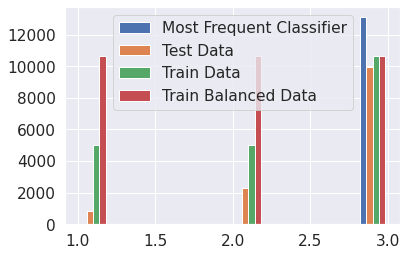

In [108]:
clf_dummy = DummyClassifier(strategy='most_frequent').fit(X_train_scaled, y_train)
y_dummy = clf_dummy.predict(X_test_scaled)
plt.hist([y_dummy, y_test, y_train, y_train_over])
plt.legend(['Most Frequent Classifier', 'Test Data', 'Train Data', 'Train Balanced Data'])

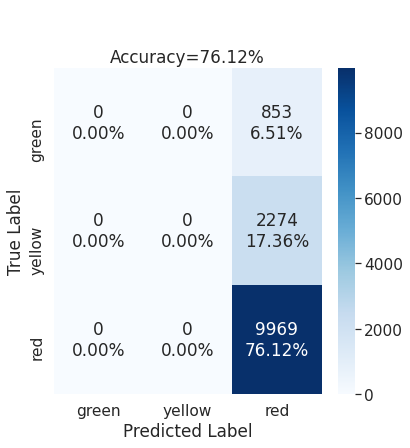

In [109]:
plot__multiclass_confusion_matrix(y_test, clf_dummy.predict(X_test_scaled),['green','yellow','red'])

In [110]:
models_summary

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
0,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",6842.0,DummyClassifier(strategy='most_frequent'),0.761225,0.001,0.515293,DummyClassifier(strategy='most_frequent'),0.001
1,"[[202, 209, 442], [549, 566, 1159], [2455, 237...",-65165.0,DummyClassifier(strategy='stratified'),0.460293,0.004,0.387475,DummyClassifier(strategy='stratified'),0.001
2,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",6842.0,DummyClassifier(strategy='prior'),0.761225,0.001,0.515293,DummyClassifier(strategy='prior'),0.002
3,"[[299, 276, 278], [767, 789, 718], [3354, 3278...",-91627.0,DummyClassifier(strategy='uniform'),0.333461,0.001,0.337259,DummyClassifier(strategy='uniform'),0.001


--> The Dummy Classifier: Most Frequent has 0.761 Accuracy!

In [111]:
models_summary['trained_model'][0].predict(X_test_scaled)

array([3, 3, 3, ..., 3, 3, 3])

### Test stock models (Default Parameters)
- KNeighborsClassifier
- SVC - Linear and RBF
- DecisionTreeClassifier
- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier




In [112]:
models_to_try = [GridSearchCV(DecisionTreeClassifier(),{'criterion':['gini', 'entropy'],'max_depth':np.arange(1,5,1)},cv=5),
                 KNeighborsClassifier(),
                 KNeighborsClassifier(n_neighbors=21),
                 DecisionTreeClassifier(),
                 DecisionTreeClassifier(criterion='gini',max_depth=3),
                 RandomForestClassifier(),
                 SVC(),
                 AdaBoostClassifier(),
                 GradientBoostingClassifier(),
                 KNeighborsClassifier(3),
                 SVC(kernel="linear", C=0.025),
                 RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
                ]


In [113]:
for m in tqdm(models_to_try) :
    res = try_model(m, X_train_scaled, y_train, X_test_scaled, y_test)
    models_summary = models_summary.append(res, ignore_index=True)
    


Trying Model :GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4])})
|  Train Score: 0.769
|  Test Score: 0.816
Trying Model :KNeighborsClassifier()
|  Train Score: 0.848
|  Test Score: 0.802
Trying Model :KNeighborsClassifier(n_neighbors=21)
|  Train Score: 0.821
|  Test Score: 0.826
Trying Model :DecisionTreeClassifier()
|  Train Score: 1.0
|  Test Score: 0.764
Trying Model :DecisionTreeClassifier(max_depth=3)
|  Train Score: 0.758
|  Test Score: 0.776
Trying Model :RandomForestClassifier()
|  Train Score: 1.0
|  Test Score: 0.833
Trying Model :SVC()
|  Train Score: 0.81
|  Test Score: 0.839
Trying Model :AdaBoostClassifier()
|  Train Score: 0.782
|  Test Score: 0.834
Trying Model :GradientBoostingClassifier()
|  Train Score: 0.831
|  Test Score: 0.836
Trying Model :KNeighborsClassifier(n_neighbors=3)
|  Train Score: 0.875
|  Test Score: 0.79
Trying Model :SVC(C=0.02

In [114]:
models_summary.sort_values(by=['test accuracy'], ascending=False)

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
10,"[[520, 294, 39], [88, 1224, 962], [10, 716, 92...",11820.0,SVC(),0.838958,5.343,0.810043,SVC(),10.025
12,"[[576, 253, 24], [127, 1310, 837], [19, 886, 9...",10893.0,GradientBoostingClassifier(),0.836133,0.051,0.831419,([DecisionTreeRegressor(criterion='friedman_ms...,17.925
11,"[[585, 227, 41], [210, 1050, 1014], [85, 598, ...",11214.0,AdaBoostClassifier(),0.833919,0.128,0.782027,"(DecisionTreeClassifier(max_depth=1, random_st...",1.309
9,"[[545, 279, 29], [113, 1292, 869], [22, 880, 9...",10447.0,RandomForestClassifier(),0.832621,0.186,1.000000,"(DecisionTreeClassifier(max_features='auto', r...",3.798
6,"[[560, 253, 40], [133, 1198, 943], [32, 873, 9...",9915.0,KNeighborsClassifier(n_neighbors=21),0.826359,5.052,0.821143,KNeighborsClassifier(n_neighbors=21),0.050
14,"[[519, 275, 59], [110, 947, 1217], [27, 589, 9...",11187.0,"SVC(C=0.025, kernel='linear')",0.826130,2.425,0.781785,"SVC(C=0.025, kernel='linear')",6.904
15,"[[550, 185, 118], [157, 404, 1713], [37, 187, ...",12482.0,"RandomForestClassifier(max_depth=5, max_featur...",0.816967,0.011,0.765886,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.083
4,"[[490, 304, 59], [127, 778, 1369], [50, 498, 9...",10372.0,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.816203,0.002,0.769182,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",2.204
5,"[[568, 239, 46], [235, 1116, 923], [112, 1040,...",5994.0,KNeighborsClassifier(),0.801848,4.621,0.848093,KNeighborsClassifier(),0.049
13,"[[571, 234, 48], [293, 1040, 941], [191, 1043,...",3879.0,KNeighborsClassifier(n_neighbors=3),0.790012,3.905,0.874509,KNeighborsClassifier(n_neighbors=3),0.053


In [115]:
models_summary.sort_values(by=['cost'], ascending=False)

,confusion matrix,cost,model_name,test accuracy,test time [s],train accuracy,trained_model,training time [s]
15,"[[550, 185, 118], [157, 404, 1713], [37, 187, ...",12482.0,"RandomForestClassifier(max_depth=5, max_featur...",0.816967,0.011,0.765886,"(DecisionTreeClassifier(max_depth=5, max_featu...",0.083
10,"[[520, 294, 39], [88, 1224, 962], [10, 716, 92...",11820.0,SVC(),0.838958,5.343,0.810043,SVC(),10.025
11,"[[585, 227, 41], [210, 1050, 1014], [85, 598, ...",11214.0,AdaBoostClassifier(),0.833919,0.128,0.782027,"(DecisionTreeClassifier(max_depth=1, random_st...",1.309
14,"[[519, 275, 59], [110, 947, 1217], [27, 589, 9...",11187.0,"SVC(C=0.025, kernel='linear')",0.826130,2.425,0.781785,"SVC(C=0.025, kernel='linear')",6.904
12,"[[576, 253, 24], [127, 1310, 837], [19, 886, 9...",10893.0,GradientBoostingClassifier(),0.836133,0.051,0.831419,([DecisionTreeRegressor(criterion='friedman_ms...,17.925
9,"[[545, 279, 29], [113, 1292, 869], [22, 880, 9...",10447.0,RandomForestClassifier(),0.832621,0.186,1.000000,"(DecisionTreeClassifier(max_features='auto', r...",3.798
4,"[[490, 304, 59], [127, 778, 1369], [50, 498, 9...",10372.0,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.816203,0.002,0.769182,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",2.204
6,"[[560, 253, 40], [133, 1198, 943], [32, 873, 9...",9915.0,KNeighborsClassifier(n_neighbors=21),0.826359,5.052,0.821143,KNeighborsClassifier(n_neighbors=21),0.050
0,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",6842.0,DummyClassifier(strategy='most_frequent'),0.761225,0.001,0.515293,DummyClassifier(strategy='most_frequent'),0.001
2,"[[0, 0, 853], [0, 0, 2274], [0, 0, 9969]]",6842.0,DummyClassifier(strategy='prior'),0.761225,0.001,0.515293,DummyClassifier(strategy='prior'),0.002


In [116]:
#custom scoring test

params = {'C' : np.arange(1,100,50)}

grid_accuracy = GridSearchCV(SVC(),params,scoring=my_score,cv=5).fit(X_train_scaled, y_train)
grid_custom = GridSearchCV(SVC(),params,scoring='accuracy',cv=5).fit(X_train_scaled, y_train)

In [ ]:
y_pred = grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
plot__multiclass_confusion_matrix(y_test, y_pred,['green','yellow','red'])

### GridSearchCV

- SVC - RBF

- GradientBoostingClassifier




In [ ]:
# model_grid = {'KNeighborsClassifier':{'n_neighbors':np.arange(1,101,10)},
#              'DecisionTreeClassifier':{'criterion':['gini', 'entropy'],
#                                        'max_depth':np.arange(2,10,1)},
#              'RandomForestClassifier':{'n_estimators':np.arange(50,201,50),
#                                        'criterion':['gini', 'entropy'],
#                                        'max_depth':np.arange(1,11,2)},
#               'SVC_linear':{'C' : np.arange(1,100,10),
#                      'kernel': ['linear'],
#                      'gamma' : ['scale','auto']},
#               'SVC_RBF':{'C' : np.arange(1,100,10),
#                      'kernel': ['rbf'],
#                      'gamma' : ['scale','auto']},
#               'AdaBoostClassifier':{'n_estimators': [10,20,30,40,50],
#                                     'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1]},
#               'GradientBoostingClassifier':{'n_estimators': [10,20,30,40,50],
#                                             'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
#                                             'max_features': [2,3,4,5,6,7,8,9],
#                                             'max_depth' : [2,3,4,5,6]},
#               'XGBClassifier':{'learning_rate': np.arange(0.01, 1.0,0.5),
#                                'n_estimators': np.arange(100, 1000,500),
#                                'max_depth': np.arange(3,10,3),
#                                'gamma': np.arange(0, 5,2)}
#              }              

In [ ]:
model_grid = {'SVC_RBF':{'C' : np.arange(1,100,10),
                     'kernel': ['rbf'],
                     'gamma' : ['scale','auto']},
              'GradientBoostingClassifier':{'n_estimators': [10,20,30,40,50],
                                            'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
                                            'max_features': [2,3,4,5,6,7,8,9],
                                            'max_depth' : [2,3,4,5,6]},
             }              

In [ ]:
for m in tqdm(model_grid.keys()):
    print(m)

In [ ]:
# WAY TOO LONG
# # XGBoost
# from xgboost import XGBClassifier
# param_grid = {'learning_rate': np.arange(0.01, 1.0,0.5),
#                                'n_estimators': np.arange(100, 1000,500),
#                                'max_depth': np.arange(3,10,3),
#                                'gamma': np.arange(0, 5,2)}

# xgb = XGBClassifier()
# xgb_cv= GridSearchCV(xgb,param_grid,cv=3)
# start = timer()
# xgb_cv.fit(X_train_scaled,y_train)
# end = timer()
# print(str(round(end - start,3)) + ' seconds elapsed.')

# #print("Best Score:" + str(xgb_cv.best_score_))
# #print("Best Parameters: " + str(xgb_cv.best_params_))

In [ ]:
# def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
#     # Get Test Scores Mean and std for each grid search
#     scores_mean = cv_results['mean_test_score']
#     scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

#     scores_sd = cv_results['std_test_score']
#     scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

#     # Plot Grid search scores
#     _, ax = plt.subplots(1,1)

#     # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
#     for idx, val in enumerate(grid_param_2):
#         ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

#     ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
#     ax.set_xlabel(name_param_1, fontsize=16)
#     ax.set_ylabel('CV Average Score', fontsize=16)
#     ax.legend(loc="best", fontsize=15)
#     ax.grid('on')

# # Calling Method 
# plot_grid_search(tree_cv.cv_results_, param_grid['max_depth'], param_grid['criterion'], 'max_depth', 'criterion' )

In [ ]:
# print("Best Score:" + str(xgb_cv.best_score_))
# print("Best Parameters: " + str(xgb_cv.best_params_))

## Review Model Outcomes — Iterate over additional models as needed.
-> pick top 2  and run hyperparameters tuning


## Bayesian Optimization

```python
def hyperparam_loss(param_x, param_y):
    
    # 1. Define machine learning model using param_x, param_y as hyper parameters
    # 2. Train the model
    # 3. Calculate loss on cross-validation set
    
    return loss
```

In [ ]:
# # Decision Tree
# param_grid = {'criterion':['gini', 'entropy'],
#               'max_depth':np.arange(1,11,2),
#               }
# tree = DecisionTreeClassifier()
# tree_cv= GridSearchCV(tree,param_grid,cv=5)
# start = timer()
# tree_cv.fit(X_train_scaled,y_train)
# end = timer()
# print(str(round(end - start,3)) + ' seconds elapsed.')
# print("Best Score:" + str(tree_cv.best_score_))
# print("Best Parameters: " + str(tree_cv.best_params_))

In [ ]:
# from bayes_opt import BayesianOptimization
# # XGBoost
# from xgboost import XGBClassifier

# pbounds = {
#     'learning_rate': (0.01, 1.0),
#     'n_estimators': (100, 1000),
#     'max_depth': (3,10),
#     'subsample': (1.0, 1.0),  # Change for big datasets
#     'colsample': (1.0, 1.0),  # Change for datasets with lots of features
#     'gamma': (0, 5)}

# def xgboost_hyper_param(learning_rate,
#                         n_estimators,
#                         max_depth,
#                         subsample,
#                         colsample,
#                         gamma):

#     max_depth = int(max_depth)
#     n_estimators = int(n_estimators)

#     clf = XGBClassifier(
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         n_estimators=n_estimators,
#         gamma=gamma)
#     return np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy'))

# optimizer = BayesianOptimization(
#     f=xgboost_hyper_param,
#     pbounds=pbounds,
#     random_state=1,
# )

In [ ]:
# start = timer()
# optimizer.maximize(n_iter=10, init_points=2)
# end = timer()
# print(str(round(end - start,3)) + ' seconds elapsed.')

In [ ]:
# optimizer.max

## Identify the Final Model
choose final model and make predictions